# Telstra Network Disruptions



 https://www.kaggle.com/c/telstra-recruiting-network/overview

## Comprension, preparacion y limpieza de los datos

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline


In [2]:
path= r'/home/ulises/Documentos/Telstra Network Disruptions/inputs/'
import scandir

#funcion para convertir todos los imputs csv en dataframes
def archivos(carpeta):
        archivos=[]
        for i in scandir.scandir(carpeta):
            a=str(i).replace("<DirEntry '"  ,'/')
            b=a.replace("'>",'')
            c=str(carpeta)+b
            archivos.append(c)
            archivos.sort()
        dfs=[]
        for i in archivos:
            df=pd.read_csv(i)
            dfs.append(df)
        return dfs


In [3]:
#asignar a cada df con un nombre adecuado
[df_event,df_log,df_resource,df_sample,df_severity,df_test,df_train]=archivos(path)

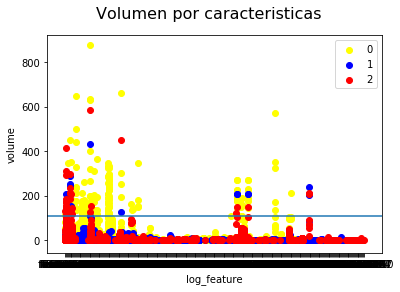

In [4]:
dd=pd.merge(df_log,df_train,on='id')
fig, ax = plt.subplots()

cdict={0:'yellow',1:'blue',2:'red'}
scatter_x = np.array(dd['log_feature'])
scatter_y = np.array(dd['volume'])
group = np.array(dd['fault_severity'])
fig.suptitle('Volumen por caracteristicas', fontsize=16)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], c=cdict[g], label=g)
ax.set_xlabel('log_feature')
ax.set_ylabel('volume')
plt.axhline(y=111)
ax.legend()
plt.savefig('demo.png')
plt.show()

In [5]:
dd['log_feature'].unique().shape

(331,)

In [6]:
df_train.head(10)

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0
5,1080,location 664,0
6,9731,location 640,0
7,15505,location 122,0
8,3443,location 263,1
9,13300,location 613,1


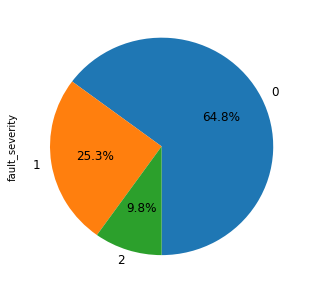

In [7]:


df_train['fault_severity'].value_counts().plot(kind='pie', startangle=270, fontsize=12, figsize=(5, 5),autopct='%1.1f%%')


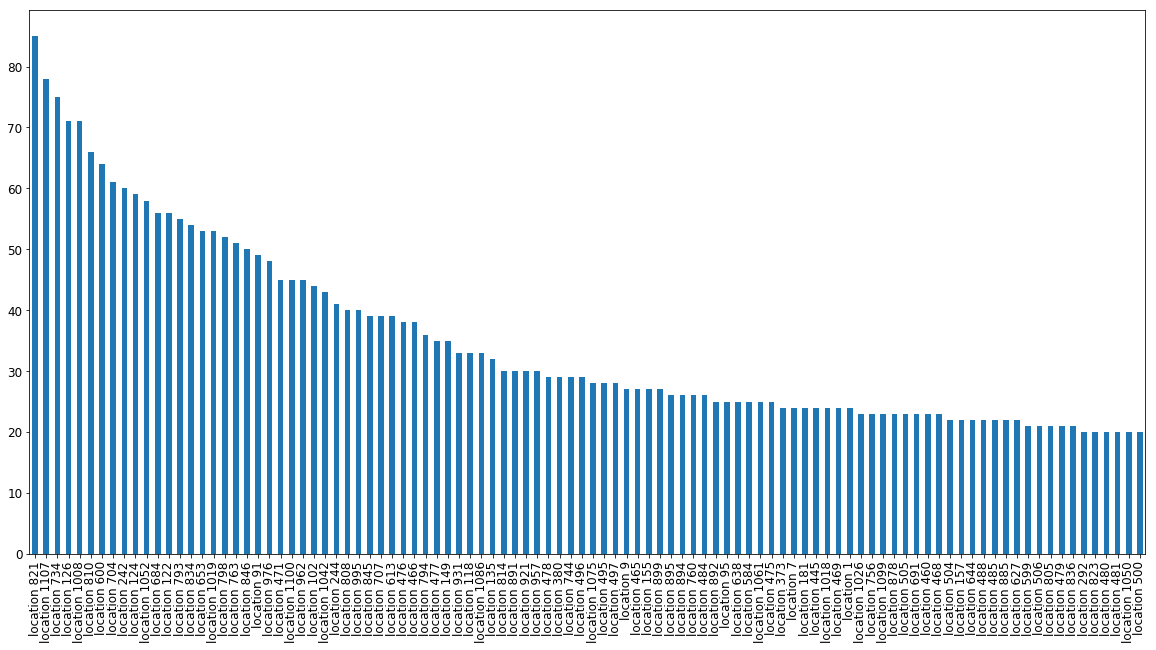

In [8]:
df_train['location'].value_counts().head(100).plot(kind='bar', fontsize=12, figsize=(20, 10))


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [10]:
#transformamos location a numerica
df_train['location'] = [int(l.replace('location ', '')) for l in df_train['location']]
df_train.head(10)

,id,location,fault_severity
0,14121,118,1
1,9320,91,0
2,14394,152,1
3,8218,931,1
4,14804,120,0
5,1080,664,0
6,9731,640,0
7,15505,122,0
8,3443,263,1
9,13300,613,1


In [11]:
df_train.isnull().values.any()
#No hay nulos

False

In [12]:
df_train.describe()


,id,location,fault_severity
count,7381.000000,7381.000000,7381.00000
mean,9264.649099,624.313779,0.45021
std,5349.290176,320.622091,0.66656
min,1.000000,1.000000,0.00000
25%,4647.000000,374.000000,0.00000
50%,9222.000000,665.000000,0.00000
75%,13885.000000,893.000000,1.00000
max,18550.000000,1126.000000,2.00000


In [13]:
len(df_train['id']),len(df_train['id'].unique())
#Todos los valores de id son unicos

(7381, 7381)

In [14]:
df_train=df_train.set_index('id')

In [15]:
df_event.head()
#tipo de evento

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


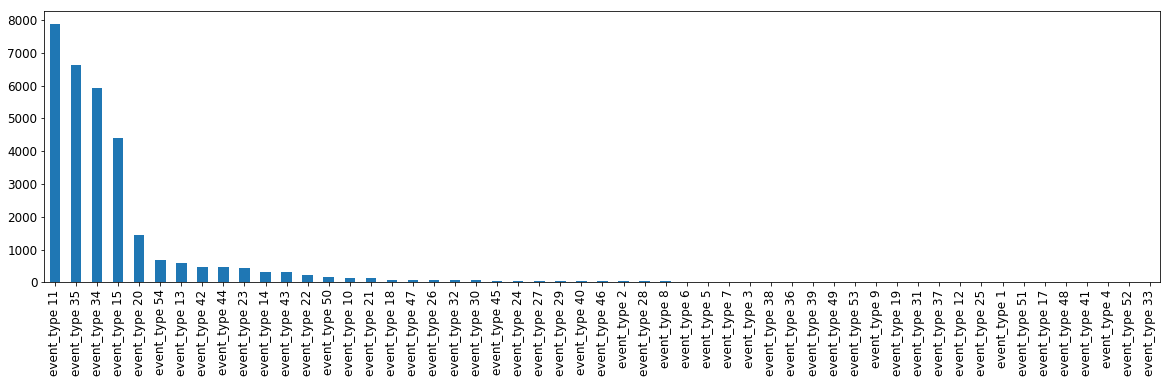

In [16]:
df_event['event_type'].value_counts().plot(kind='bar', fontsize=12, figsize=(20, 5))

In [17]:
df_event.describe()

,id
count,31170.000000
mean,9267.735258
std,5363.817181
min,1.000000
25%,4625.250000
50%,9287.500000
75%,13915.000000
max,18552.000000


In [18]:
df_event.isnull().values.any()
#No hay nulos

False

In [19]:

len(df_event['id']),len(df_event['id'].unique())
#id no es un identificador unico en este caso

(31170, 18552)

In [20]:
df_event=df_event.set_index('id')
#vectorizamos
df_event_v = pd.get_dummies(df_event).groupby(df_event.index).sum().astype(int)
df_event_v['event_count'] = pd.get_dummies(df_event).groupby(df_event.index).size()

In [21]:
df_event_v.head(10)

,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,event_type_event_type 19,...,event_type_event_type 50,event_type_event_type 51,event_type_event_type 52,event_type_event_type 53,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,event_type_event_type 9,event_count
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [22]:
df_event_v.describe()

,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,event_type_event_type 19,...,event_type_event_type 50,event_type_event_type 51,event_type_event_type 52,event_type_event_type 53,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,event_type_event_type 9,event_count
count,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,...,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000
mean,0.000216,0.007816,0.425183,0.000323,0.031371,0.017788,0.236902,0.000162,0.003935,0.000755,...,0.008301,0.000216,0.000054,0.000916,0.036869,0.001509,0.001294,0.001563,0.000755,1.680142
std,0.014682,0.088064,0.494384,0.017981,0.174324,0.132183,0.425193,0.012716,0.062607,0.027461,...,0.090733,0.014682,0.007342,0.030258,0.188446,0.038821,0.035945,0.039507,0.027461,0.716816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


In [23]:
df_log.head(10)

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
5,5022,feature 193,4
6,5022,feature 71,3
7,6852,feature 201,2
8,6852,feature 56,1
9,6852,feature 80,2


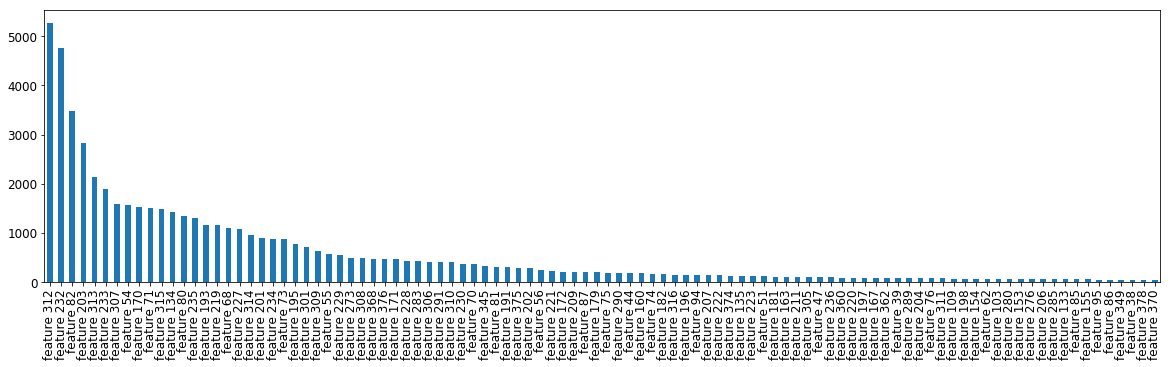

In [24]:
df_log['log_feature'].value_counts().head(100).plot(kind='bar', fontsize=12, figsize=(20, 5))

In [25]:
df_log.isnull().values.any()

False

In [26]:
len(df_log['id']),len(df_log['id'].unique())
#id no es un identificador unico en este caso

(58671, 18552)

In [27]:
df_log.describe()

,id,volume
count,58671.000000,58671.000000
mean,9271.368905,9.685296
std,5355.142878,27.314433
min,1.000000,1.000000
25%,4658.500000,1.000000
50%,9275.000000,2.000000
75%,13903.000000,7.000000
max,18552.000000,1310.000000


In [28]:
df_log=df_log.set_index('id')
df_log_v= pd.get_dummies(df_log)
#Multiplicar volumen por caracteristicas
df_log_v.iloc[:, 1:] = df_log_v.iloc[:, 1:].multiply(df_log_v['volume'], axis=0)

df_log_v = df_log_v.groupby(df_log.index).sum().astype(int)
df_log_v['features_count'] = pd.get_dummies(df_log).groupby(df_log.index).size()


In [29]:
df_resource.head(10)

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8
5,5611,resource_type 8
6,14838,resource_type 8
7,2588,resource_type 8
8,4848,resource_type 8
9,6914,resource_type 8


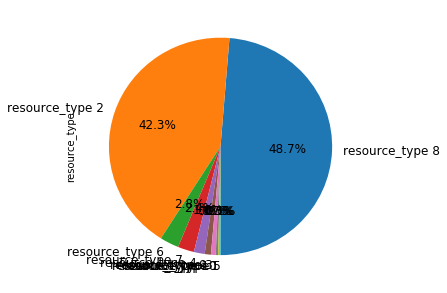

In [30]:
df_resource['resource_type'].value_counts().plot(kind='pie', startangle=270, fontsize=12, figsize=(5, 5),autopct='%1.1f%%')


In [31]:
len(df_resource['id']),len(df_resource['id'].unique())
#id no es un identificador unico en este caso

(21076, 18552)

In [32]:
df_resource.isnull().values.any()

False

In [33]:
df_resource=df_resource.set_index('id')
#vectorizamos
df_resource_v = pd.get_dummies(df_resource).groupby(df_resource.index).sum().astype(int)
df_resource_v['resource_count'] = pd.get_dummies(df_resource).groupby(df_resource.index).size()

In [34]:
df_resource_v.head()

,resource_type_resource_type 1,resource_type_resource_type 10,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9,resource_count
id,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,1,0,2
2,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,1


In [35]:
df_severity.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


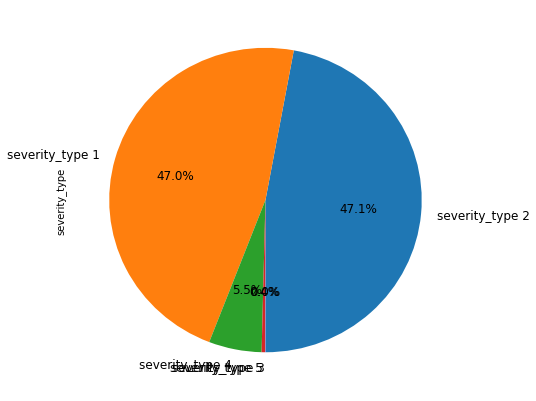

In [36]:
df_severity['severity_type'].value_counts().plot(kind='pie', startangle=270, fontsize=12, figsize=(7,7),autopct='%1.1f%%')


In [37]:
len(df_severity['id']),len(df_severity['id'].unique())
#id unico, cada una tiene solo un tipo de serveridad asociado

(18552, 18552)

In [38]:
#la convertimos en una variable numerica
df_severity['severity_type'] = [int(l.replace('severity_type ', '')) for l in df_severity['severity_type']]
df_severity.head(10)

,id,severity_type
0,6597,2
1,8011,2
2,2597,2
3,5022,1
4,6852,1
5,5611,2
6,14838,1
7,2588,1
8,4848,1
9,6914,1


In [39]:
df_severity=df_severity.set_index('id')

In [40]:
#Teniendo listas las caracteristicas de los demas dataframes, los unimos
df_train_t = df_train.join(df_event_v).join(df_log_v).join(df_resource_v).join(df_severity)
df_train_t.shape

(7381, 456)

In [41]:
df_train_t.isnull().values.any()

False

In [42]:
#Hacemos lo mismo para test
df_test['location'] = [int(l.replace('location ', '')) for l in df_test['location']]
df_test=df_test.set_index('id')
df_test_t = df_test.join(df_event_v).join(df_log_v).join(df_resource_v).join(df_severity)
df_test.shape, df_test_t.shape


((11171, 1), (11171, 455))

In [43]:
df_test_t.isnull().values.any()

False

In [44]:
df_train_t.head(10)

,location,fault_severity,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9,resource_count,severity_type
id,,,,,,,,,,,,,,,,,,,,,
14121,118,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
9320,91,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
14394,152,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
8218,931,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
14804,120,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,2,1
1080,664,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
9731,640,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4
15505,122,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
3443,263,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2


## Modelado

In [45]:
X = np.array(df_train_t.drop(['fault_severity'],1))
y = np.array(df_train_t['fault_severity'])
X.shape

(7381, 455)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, stratify=y)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/home/ulises/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [48]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [49]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(predictions)[0:50]

[0 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 2 1 2 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 2 0 1 1 0 0 0 1 0]


In [50]:
msc=model.score(X_train,y_train)
msc

0.73742848539596506

In [51]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=5, random_state=0)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
msg = "%s: %f (%f)" % (name, cv_results.mean()*-1, cv_results.std())
print(msg)

Logistic Regression: 0.767750 (0.038792)


In [52]:
predictions = model.predict_proba(X_test)
asc=log_loss(y_test, predictions)
asc

0.74328217616142012

In [53]:
lis=[]
model=[name,msc,cv_results.mean(), cv_results.std(),asc]
lis.append(model)

In [54]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'n_neighbors':[18,30,50,100],
    'weights': ['uniform', 'distance']}

In [55]:
#classifier = KNeighborsClassifier()
#clf = GridSearchCV(classifier, parameter_space, n_jobs=-1, cv=3,scoring='neg_log_loss')
#clf.fit(X_train, y_train)
## Best paramete set
#print('Best parameters found:\n', clf.best_params_)
##('Best parameters found:\n', {'n_neighbors': 100, 'weights': 'distance'})

In [56]:
model = KNeighborsClassifier(n_neighbors=100,weights='uniform')
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(predictions)[0:50]

[0 0 1 2 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 2 2 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 2 0 0 1 1 0 0 1 0]


In [57]:
msc=model.score(X_train,y_train)
msc

0.72041553748870824

In [58]:
name='KNeigbors Classifier'
kfold = model_selection.KFold(n_splits=5, random_state=0)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
msg = "%s: %f (%f)" % (name, cv_results.mean()*-1, cv_results.std())
print(msg)

KNeigbors Classifier: 0.644415 (0.019517)


In [59]:
predictions = model.predict_proba(X_test)
asc=log_loss(y_test, predictions)
asc


0.62868550870531159

In [60]:
model=[name,msc,cv_results.mean(), cv_results.std(),asc]
lis.append(model)



In [61]:
#GNB
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(predictions)[0:50]

[2 2 2 2 0 2 1 2 2 2 1 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 2 0 1 1 1 1 0 2 2
 1 2 1 1 2 1 2 2 2 2 0 2 2]


In [62]:
msc=model.score(X_train,y_train)
msc


0.28003613369467029

In [63]:
name='Gaussian NB'
kfold = model_selection.KFold(n_splits=5, random_state=0)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
msg = "%s: %f (%f)" % (name, cv_results.mean()*-1, cv_results.std())
print(msg)

Gaussian NB: 24.902336 (0.339692)


In [64]:
predictions = model.predict_proba(X_test)
asc=log_loss(y_test, predictions)
print(asc)
model=[name,msc,cv_results.mean(), cv_results.std(),asc]
lis.append(model)

24.8815305614


In [65]:
#SVC
from sklearn.svm import SVC
parameter_space = {
    'kernel':['poly', 'rbf']}
#classifier = SVC(probability=True)
#clf = GridSearchCV(classifier, parameter_space, n_jobs=-1, cv=2, scoring='neg_log_loss')
#clf.fit(X_train, y_train)
#
## Best paramete set
#print('Best parameters found:\n', clf.best_params_)
##('Best parameters found:\n', {'kernel': 'rbf'})

In [66]:
model = SVC(probability=True,kernel='rbf')
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(predictions)[0:50]

[0 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 2 1 2 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [67]:
msc=model.score(X_train,y_train)
msc

0.73020174646190905

In [68]:
name='SVC'
kfold = model_selection.KFold(n_splits=5, random_state=0)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
msg = "%s: %f (%f)" % (name, cv_results.mean()*-1, cv_results.std())
print(msg)

SVC: 0.721548 (0.019247)


In [69]:
predictions = model.predict_proba(X_test)
asc=log_loss(y_test, predictions)
print(asc)
model=[name,msc,cv_results.mean(), cv_results.std(),asc]
lis.append(model)

0.732487452045


In [70]:
#DecisionTree C
from sklearn.tree import DecisionTreeClassifier

#parameter_space2 = {
#    'splitter':['best','random'],
#    'criterion': ['gini','entropy']
#}
#classifier2 = DecisionTreeClassifier()
#clf2 = GridSearchCV(classifier2, parameter_space2, n_jobs=-1, cv=3, scoring='neg_log_loss')
#clf2.fit(X_train, y_train)
#
## Best paramete set
#print('Best parameters found:\n', clf2.best_params_)
##('Best parameters found:\n', {'splitter': 'best', 'criterion': 'gini'})
#

In [71]:
model = DecisionTreeClassifier(splitter='best',criterion='gini')
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(predictions)[0:50]

[0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 2 1 2 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 1 2 2 1 0 1 0]


In [72]:
msc=model.score(X_train,y_train)
msc

1.0

In [73]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=5, random_state=0)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
msg = "%s: %f (%f)" % (name, cv_results.mean()*-1, cv_results.std())
print(msg)

DecisionTree: 9.838473 (0.174835)


In [74]:
predictions = model.predict_proba(X_test)
asc=log_loss(y_test, predictions)
print(asc)
model=[name,msc,cv_results.mean(), cv_results.std(),asc]
lis.append(model)

10.1887053506


In [75]:
#RandomForest C
from sklearn.ensemble import RandomForestClassifier

#parameter_space2 = {
#    'n_estimators':range(50,301,50),
#    'criterion': ['gini','entropy']
#}
#classifier2 = RandomForestClassifier()
#clf2 = GridSearchCV(classifier2, parameter_space2, n_jobs=-1, cv=3, scoring='neg_log_loss')
#clf2.fit(X_train, y_train)
#
## Best paramete set
#print('Best parameters found:\n', clf2.best_params_)
##('Best parameters found:\n', {'n_estimators': 300, 'criterion': 'entropy'})

In [76]:
model = RandomForestClassifier(n_estimators=300,criterion='entropy')
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(predictions)[0:50]

[0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 2 1 2 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 1 2 2 1 0 1 0]


In [77]:
msc=model.score(X_train,y_train)
msc

1.0

In [78]:
name='Random Forest C'
kfold = model_selection.KFold(n_splits=5, random_state=0)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
msg = "%s: %f (%f)" % (name, cv_results.mean()*-1, cv_results.std())
print(msg)

Random Forest C: 0.662660 (0.060854)


In [79]:
predictions = model.predict_proba(X_test)
asc=log_loss(y_test, predictions)
print(asc)
model=[name,msc,cv_results.mean(), cv_results.std(),asc]
lis.append(model)

0.732320958393


In [80]:
#XGBoost
from xgboost import XGBClassifier
#parameter_space = {
#    'max_depth':[4,6,8], 'eta':[0.015,0.3,0.45],'colsample_bytree':[0.5,1],'min_child_weight':[1,3,5]}
#
#classifier = XGBClassifier(booster='gbtree')
#clf = GridSearchCV(classifier, parameter_space, n_jobs=-1, cv=3, scoring='neg_log_loss')
#clf.fit(X_train, y_train)
#
# #Best paramete set
#print('Best parameters found:\n', clf.best_params_)
##('Best parameters found:\n', {'eta': 0.015, 'colsample_bytree': 0.5, 'max_depth': 8, 'min_child_weight': 1})
#


In [81]:
model = XGBClassifier(eta= 0.015, colsample_bytree = 0.5, max_depth = 8, min_child_weight = 1)
model.fit(X_train,y_train)
predictions = model.predict(X_train)
print(predictions)[0:50]



[0 1 0 0 0 2 0 1 0 0 1 1 0 0 0 1 1 1 0 0 2 2 1 2 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 2 0 1 2 0 1 0 1 0]


In [82]:
msc=model.score(X_train,y_train)
msc

0.86766034327009933

In [83]:

name='XGBoost'
kfold = model_selection.KFold(n_splits=5, random_state=0)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_log_loss')
msg = "%s: %f (%f)" % (name, cv_results.mean()*-1, cv_results.std())
print(msg)

XGBoost: 0.517237 (0.011390)


In [84]:
predictions = model.predict_proba(X_test)
asc=log_loss(y_test, predictions)
print(asc)
model=[name,msc,cv_results.mean(), cv_results.std(),asc]
lis.append(model)

0.508881995764


## Evaluacion

In [85]:
df_models=pd.DataFrame(lis, columns=('name','model_score','cv_mean','cv_std','log_loss')).sort_values(by="log_loss")
df_models

,name,model_score,cv_mean,cv_std,log_loss
6,XGBoost,0.867660,-0.517237,0.011390,0.508882
1,KNeigbors Classifier,0.720416,-0.644415,0.019517,0.628686
5,Random Forest C,1.000000,-0.662660,0.060854,0.732321
3,SVC,0.730202,-0.721548,0.019247,0.732487
0,Logistic Regression,0.737428,-0.767750,0.038792,0.743282
4,DecisionTree,1.000000,-9.838473,0.174835,10.188705
2,Gaussian NB,0.280036,-24.902336,0.339692,24.881531


## Despliegue


In [86]:
X_train = np.array(df_train_t.drop(['fault_severity'],1))
y_train = np.array(df_train_t['fault_severity'])
X_test = np.array(df_test_t)
X_test.shape

(11171, 455)

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
df_test_t['id']=df_test_t.index


In [89]:
model = XGBClassifier(eta= 0.015, colsample_bytree = 0.5, max_depth = 8, min_child_weight = 1)
model.fit(X_train,y_train)
predictions2=model.predict_proba(X_test)

pred=pd.DataFrame(predictions2,columns=['predict_0', 'predict_1', 'predict_2'], index=df_test_t.index)
pred
submission=pd.concat([df_test_t[['id']],pred],axis=1)
submission.to_csv(r'/home/ulises/Documentos/Telstra Network Disruptions/outputs/submission_20.csv',index=False)

## Resultado

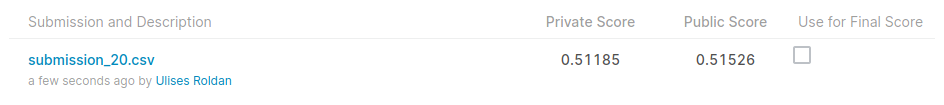

In [2]:
from IPython.display import Image
Image(filename='/home/ulises/Documentos/resultado_kaggle.png') 